# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

In [3]:
# Import libraries and modules.

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import plotly.express as px 

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv("Unicorn_Companies.csv")

In [5]:
# Display the first 10 rows of the data.

df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [6]:
# Get the shape of the dataset.
#df_companies.info()
#
df_companies.shape

(1074, 10)

In [13]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [15]:
df_companies.head(2)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


In [8]:
# Create a new column "Year Joined" from "Date Joined".
df_companies["Date Joined"]= pd.to_datetime(df_companies["Date Joined"])
df_companies ["Year Joined"] = df_companies["Date Joined"].dt.year

df_companies.head(2)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012


In [9]:
# Define the `str_to_num()` function
"""Instead of creating function, I eleminate unnecessary caracters and assigned the numeric values to new valuation column"""
df_companies["valuation_num"] = df_companies["Valuation"].str[1:-1].astype('float')
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180.0
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100.0
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100.0
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95.0
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46.0


In [13]:
# Find the number of missing values in each column in this dataset.

df_companies_null = pd.isna(df_companies).sum()
df_companies_null

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
dtype: int64

In [70]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
mask = df_companies.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = mask.any(axis=1)
mask.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [72]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32.0
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4.0
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3.0
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3.0
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3.0
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2.0
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2.0
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1.0
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1.0
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1.0


In [57]:
# Store the total number of values in a variable called `count_total`
rows, cols = df_companies.shape
count_total = rows * cols
count_total

12888

In [40]:
# Drop the rows containing missing values, determine number of remaining values 

 #1. Drop rows with missing values (any missing value in a row)
df_filtered = df_companies.dropna()  # This creates a new DataFrame

# 2. Count the number of rows in the filtered DataFrame
count_dropna_rows = df_filtered.shape[0]

rows, cols = df_companies.shape
count_total_after_drop = rows * cols
# (Optional) Alternative approach using inplace=True (modifies original DataFrame)
# df_companies.dropna(inplace=True)
# count_dropna_rows = df_companies.shape[0]  # Recount after dropping rows

count_total_after_drop

12888

In [42]:
# Drop the columns containing missing values, determine number of remaining values
df_filtered = df_companies.dropna(axis=1)  # Specify axis=1 for columns

# 2. Count the total number of cells in the filtered DataFrame
count_dropna_columns = df_filtered.size
count_dropna_columns

10740

In [45]:
# Print the percentage of values removed by dropping rows.
original_size = df_companies.size
percent_removed_rows = (count_dropna_rows / original_size) * 100

# Print the percentage of values removed by dropping columns.

percent_removed_cols = ( count_dropna_columns / original_size) * 100



# Print results
print("Original number of cells:", original_size)
print("Number of cells remaining after dropping rows with missing values:", count_dropna_rows)
print("Percentage of values removed by dropping rows:", f"{percent_removed_rows:.2f}%")


Original number of cells: 12888
Number of cells remaining after dropping rows with missing values: 1057
Percentage of values removed by dropping rows: 8.20%


In [90]:
# 1. Fill missing values using the 'fillna()' method, back-filling

### YOUR CODE HERE ###
df_companies_backfill = df_companies.fillna(method='backfill')
#df_companies_backfill.tail()
# 2. Show the rows that previously had missing values
df_companies_backfill.iloc[df_missing_rows.index, :]
### YOUR CODE HERE ###

#df_missing_rows.index


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32.0
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4.0
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3.0
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3.0
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3.0
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2.0
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2.0
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1.0
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1.0
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1.0


In [98]:
# 1. Create a Boolean mask using conditional logic

city = ["Beijing", "San Francisco", "London"]
mask= (df_companies["Industry"]=="Hardware") & (df_companies['City'].isin(city)) | ((df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London'))

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

df_invest = df_companies[mask]
df_invest.shape

(8, 12)

In [108]:
# Group the data by`Country/Region`

national_valuations = df_companies.groupby(by = "Country/Region")["valuation_num"].sum().sort_values(ascending = False).reset_index().rename(columns={"valuation_num":"Summed valuation"})

#national_valuations = grouped.sort_values(ascending = False).sum()

# Print the top 15 values of the DataFrame.

national_valuations.head(15)

,Country/Region,Summed valuation
0,United States,1933.0
1,China,696.0
2,India,196.0
3,United Kingdom,195.0
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0
9,South Korea,41.0


In [110]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations.iloc[4: ,:]
national_valuations_no_big4.head()

,Country/Region,Summed valuation
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0


In [116]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

big_4 = ["United States","China", "India", "United Kingdom"]

mask = ~national_valuations['Country/Region'].isin(big_4)
no_big_4 = national_valuations[mask]

no_big_4.head()
### YOUR CODE HERE ###

,Country/Region,Summed valuation
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0


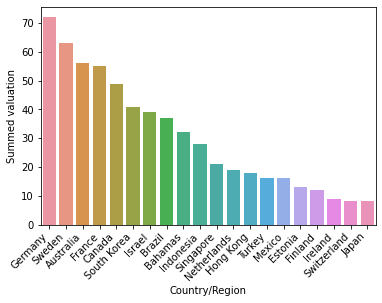

In [120]:
# Create a barplot to compare the top 20 countries with highest company valuations.
data= national_valuations_no_big4.head(20)
sns.barplot(x=data["Country/Region"], y=data["Summed valuation"], ci=False)
plt.xticks(rotation=45, horizontalalignment='right')

# Show the plot.
plt.show()
### YOUR CODE HERE ###

In [124]:
# Plot the sum of valuations per country.

fig = px.scatter_geo(data,
                    locations='Country/Region', 
               size='Summed valuation', 
               locationmode='country names', 
               color='Country/Region',)

fig.show()